# Relatório do Projeto CNN com CIFAR-10

## 1. Implementação e Avaliação de Topologias de CNN

O projeto envolveu a implementação e a otimização de redes neurais convolucionais (CNN) usando o dataset CIFAR-10. Foi conduzida uma busca por hiperparâmetros para identificar as configurações ótimas para diferentes topologias de CNN.

### Experimentos Realizados:

- **Dataset Utilizado:** CIFAR-10
- **Topologias de CNN Avaliadas:**
  - Experimentos variando o número de filtros, o tamanho do kernel, a taxa de dropout, o número de camadas e o otimizador.
- **Métricas de Avaliação:**
  - Os modelos foram avaliados com base em seu valor objetivo, que parece estar correlacionado com a acurácia.

### Analises feitas:

Ver os graficos mais a frente no notebook.

- **Slice Plot:**
  - Mostra a distribuição do valor objetivo em relação a diferentes hiperparâmetros.
- **Contour Plot:**
  - Fornece uma visão da interação entre pares de hiperparâmetros e o valor objetivo.
- **Parallel Coordinate Plot:**
  - Apresenta uma visão geral da performance e dos hiperparâmetros de todos os experimentos.
- **Hyperparameter Importance:**
  - Destaca a importância relativa de cada hiperparâmetro na determinação da performance do modelo.

## 2. Matriz de Confusão dos Dois Melhores Modelos

A matriz de confusão não foi fornecida diretamente, mas pode ser inferida a partir das métricas de avaliação e dos gráficos de desempenho dos modelos.

### Modelos Selecionados:

- **Melhor Modelo 1:** (Identificar o modelo a partir dos gráficos)
- **Melhor Modelo 2:** (Identificar o modelo a partir dos gráficos)

### Matriz de Confusão:

- No final do notebook.

## 3. Avaliação das Diferenças entre os Dois Melhores Modelos

A otimização de hiperparâmetros realizada revelou dois modelos de destaque com diferenças sutis em suas configurações. Ambos os modelos utilizaram o otimizador 'adam' e um tamanho de kernel de (3, 3), mas diferiram no número de filtros e na taxa de dropout.

### Comparação dos Modelos:

- **Diferenças nos Parâmetros e Topologias:**
  - O **Melhor Modelo 1** foi configurado com 3 camadas, 128 filtros e uma taxa de dropout de aproximadamente 0.122. Em contraste, o **Melhor Modelo 2** também tinha 3 camadas, mas com 64 filtros e uma taxa de dropout mais alta de aproximadamente 0.188. Essas diferenças sugerem uma abordagem mais conservadora para a regularização no Modelo 2, possivelmente para compensar o menor número de filtros.
  
- **Impacto no Desempenho:**
  - A diferença no número de filtros entre os dois modelos pode ter um impacto significativo na capacidade de captura de características das imagens. O Modelo 1, com mais filtros, pode ter sido capaz de aprender representações mais ricas, o que é particularmente útil no dataset CIFAR-10 que contém imagens complexas de 10 classes diferentes. Por outro lado, uma taxa de dropout mais elevada no Modelo 2 sugere uma tentativa de reduzir o overfitting, o que pode ser benéfico se o modelo estiver aprendendo representações excessivamente adaptadas aos dados de treinamento. A escolha do otimizador 'adam' para ambos os modelos indica uma preferência por uma convergência rápida e eficiente durante o treinamento.
  
A interação desses hiperparâmetros e seu impacto no desempenho do modelo podem ser visualizados e inferidos mais claramente a partir do Contour Plot e do Parallel Coordinate Plot. Enquanto o Contour Plot pode ilustrar como as taxas de dropout e o número de filtros interagem entre si, o Parallel Coordinate Plot destaca como cada configuração individual se traduz em um valor objetivo global. A importância relativa de cada hiperparâmetro, conforme observado no gráfico de importâncias de hiperparâmetros, também fornece insights sobre quais configurações desempenham papéis mais significativos na performance do modelo.



# Comparação entre Redes MLP e CNN

## Resultados Obtidos

Na ultima sessao deste notebook, foi realizada uma comparação direta entre uma rede MLP previamente implementada e a rede CNN desenvolvida, focando-se em dois aspectos principais: acurácia e número de parâmetros.

### Acurácia

- **MLP:** A acurácia obtida pela rede MLP foi de aproximadamente 23.65%. Este resultado indica uma performance baixa, o que pode ser atribuído a diversos fatores, como a complexidade intrínseca do dataset CIFAR-10 e as limitações da arquitetura MLP em capturar as características espaciais das imagens.
  
- **CNN:** Por outro lado, a rede CNN alcançou uma acurácia significativamente maior de aproximadamente 77.41%. Este desempenho superior demonstra a eficácia das CNNs em tarefas de classificação de imagens, graças à sua capacidade de aprender representações hierárquicas de dados visuais.

### Número de Parâmetros

- **MLP:** A rede MLP possui um total de 1,707,274 parâmetros. Este número elevado se deve à natureza totalmente conectada das camadas da MLP, o que resulta em uma grande quantidade de parâmetros, especialmente em tarefas com dados de alta dimensão, como imagens.

- **CNN:** Em contraste, a rede CNN apresenta um total de 594,378 parâmetros, significativamente menos que a MLP. As CNNs utilizam camadas convolucionais que compartilham pesos, reduzindo drasticamente o número de parâmetros necessários, o que também ajuda a mitigar o overfitting.

## Conclusões

A comparação entre as redes MLP e CNN no contexto do dataset CIFAR-10 fornece insights sobre a adequação de diferentes arquiteturas de redes neurais para tarefas específicas. Enquanto a MLP mostrou-se menos eficaz para a classificação de imagens complexas, a CNN destacou-se não apenas pela sua maior acurácia, mas também pela eficiência em termos do número de parâmetros. Este estudo reforça a importância de escolher a arquitetura apropriada com base nas características da tarefa e na natureza dos dados a serem processados.



In [11]:
!pip install tensorflow optuna matplotlib scikit-learn

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalização dos dados de imagem
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Codificação one-hot para as etiquetas de classe
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verificar as dimensões dos dados
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalização dos dados de imagem
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Codificação one-hot para as etiquetas de classe
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verificar as dimensões dos dados
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


#  Definir a Estrutura da CNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(n_layers, n_filters, kernel_size, dropout_rate, optimizer):
    model = Sequential()
    model.add(Conv2D(n_filters, kernel_size, activation='relu', input_shape=(32, 32, 3)))

    for _ in range(n_layers - 1):
        model.add(Conv2D(n_filters, kernel_size, activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Configuração do Optuna para Otimização de Hiperparâmetros

In [4]:
import optuna
import os
import logging
import sys

# Definir uma função de callback para exibir informações de progresso
def print_progress(study, trial):
    print(f"Trial {trial.number} finished with value: {trial.value} and parameters: {trial.params}.")
    print(f"Best trial so far: Trial {study.best_trial.number} with value: {study.best_trial.value}.")

def objective(trial):
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_filters = trial.suggest_categorical('n_filters', [32, 64, 128])
    kernel_size = trial.suggest_categorical('kernel_size', [(3, 3), (5, 5)])
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'sgd'])

    model = create_cnn_model(n_layers, n_filters, kernel_size, dropout_rate, optimizer)
    model.fit(x_train, y_train, validation_split=0.1, epochs=7, verbose=0)

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return accuracy

# Configurar o logging
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
optuna.logging.set_verbosity(optuna.logging.INFO)

# Definir o número máximo de threads
max_threads = os.cpu_count()

# Criar e executar o estudo do Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=16, n_jobs=max_threads, callbacks=[print_progress])


[I 2023-12-21 03:41:32,112] A new study created in memory with name: no-name-92671fc5-e5f0-4338-a9d7-aae15534381d


A new study created in memory with name: no-name-92671fc5-e5f0-4338-a9d7-aae15534381d


<ipython-input-4-e8f27cd49867>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 3) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 5) which is of type tuple.
  warnings.warn(message)
[I 2023-12-21 03:43:56,397] Trial 1 finished with value: 0.5823000073432922 and parameters: {'n_layers': 1, 'n_filters': 32, 'kernel_size': (5, 5), 'dropout_rate': 0.15961584980387955

Trial 1 finished with value: 0.5823000073432922 and parameters: {'n_layers': 1, 'n_filters': 32, 'kernel_size': (5, 5), 'dropout_rate': 0.15961584980387955, 'optimizer': 'adam'}. Best is trial 1 with value: 0.5823000073432922.
Trial 1 finished with value: 0.5823000073432922 and parameters: {'n_layers': 1, 'n_filters': 32, 'kernel_size': (5, 5), 'dropout_rate': 0.15961584980387955, 'optimizer': 'adam'}.
Best trial so far: Trial 1 with value: 0.5823000073432922.


[I 2023-12-21 03:44:18,908] Trial 6 finished with value: 0.6733999848365784 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.12799290797223573, 'optimizer': 'adam'}. Best is trial 6 with value: 0.6733999848365784.


Trial 6 finished with value: 0.6733999848365784 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.12799290797223573, 'optimizer': 'adam'}. Best is trial 6 with value: 0.6733999848365784.
Trial 6 finished with value: 0.6733999848365784 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.12799290797223573, 'optimizer': 'adam'}.
Best trial so far: Trial 6 with value: 0.6733999848365784.


[I 2023-12-21 03:44:19,682] Trial 3 finished with value: 0.6617000102996826 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.4526568332499068, 'optimizer': 'adam'}. Best is trial 6 with value: 0.6733999848365784.


Trial 3 finished with value: 0.6617000102996826 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.4526568332499068, 'optimizer': 'adam'}. Best is trial 6 with value: 0.6733999848365784.
Trial 3 finished with value: 0.6617000102996826 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.4526568332499068, 'optimizer': 'adam'}.
Best trial so far: Trial 6 with value: 0.6733999848365784.


[I 2023-12-21 03:44:20,368] Trial 5 finished with value: 0.5530999898910522 and parameters: {'n_layers': 2, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.4323805164197013, 'optimizer': 'sgd'}. Best is trial 6 with value: 0.6733999848365784.


Trial 5 finished with value: 0.5530999898910522 and parameters: {'n_layers': 2, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.4323805164197013, 'optimizer': 'sgd'}. Best is trial 6 with value: 0.6733999848365784.
Trial 5 finished with value: 0.5530999898910522 and parameters: {'n_layers': 2, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.4323805164197013, 'optimizer': 'sgd'}.
Best trial so far: Trial 6 with value: 0.6733999848365784.


[I 2023-12-21 03:44:41,685] Trial 4 finished with value: 0.5401999950408936 and parameters: {'n_layers': 3, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.12148990954278545, 'optimizer': 'sgd'}. Best is trial 6 with value: 0.6733999848365784.


Trial 4 finished with value: 0.5401999950408936 and parameters: {'n_layers': 3, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.12148990954278545, 'optimizer': 'sgd'}. Best is trial 6 with value: 0.6733999848365784.
Trial 4 finished with value: 0.5401999950408936 and parameters: {'n_layers': 3, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.12148990954278545, 'optimizer': 'sgd'}.
Best trial so far: Trial 6 with value: 0.6733999848365784.


[I 2023-12-21 03:44:47,321] Trial 2 finished with value: 0.7111999988555908 and parameters: {'n_layers': 3, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.1877966130624872, 'optimizer': 'adam'}. Best is trial 2 with value: 0.7111999988555908.


Trial 2 finished with value: 0.7111999988555908 and parameters: {'n_layers': 3, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.1877966130624872, 'optimizer': 'adam'}. Best is trial 2 with value: 0.7111999988555908.
Trial 2 finished with value: 0.7111999988555908 and parameters: {'n_layers': 3, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.1877966130624872, 'optimizer': 'adam'}.
Best trial so far: Trial 2 with value: 0.7111999988555908.


[I 2023-12-21 03:44:51,057] Trial 7 finished with value: 0.7290999889373779 and parameters: {'n_layers': 3, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.12170847188319188, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.


Trial 7 finished with value: 0.7290999889373779 and parameters: {'n_layers': 3, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.12170847188319188, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.
Trial 7 finished with value: 0.7290999889373779 and parameters: {'n_layers': 3, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.12170847188319188, 'optimizer': 'adam'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:45:13,521] Trial 0 finished with value: 0.6171000003814697 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.45943419338708735, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.


Trial 0 finished with value: 0.6171000003814697 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.45943419338708735, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.
Trial 0 finished with value: 0.6171000003814697 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.45943419338708735, 'optimizer': 'adam'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:46:12,253] Trial 8 finished with value: 0.5730999708175659 and parameters: {'n_layers': 1, 'n_filters': 64, 'kernel_size': (5, 5), 'dropout_rate': 0.3221384734644912, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.


Trial 8 finished with value: 0.5730999708175659 and parameters: {'n_layers': 1, 'n_filters': 64, 'kernel_size': (5, 5), 'dropout_rate': 0.3221384734644912, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.
Trial 8 finished with value: 0.5730999708175659 and parameters: {'n_layers': 1, 'n_filters': 64, 'kernel_size': (5, 5), 'dropout_rate': 0.3221384734644912, 'optimizer': 'adam'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:46:51,435] Trial 9 finished with value: 0.580299973487854 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (5, 5), 'dropout_rate': 0.11471591292176889, 'optimizer': 'sgd'}. Best is trial 7 with value: 0.7290999889373779.


Trial 9 finished with value: 0.580299973487854 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (5, 5), 'dropout_rate': 0.11471591292176889, 'optimizer': 'sgd'}. Best is trial 7 with value: 0.7290999889373779.
Trial 9 finished with value: 0.580299973487854 and parameters: {'n_layers': 2, 'n_filters': 64, 'kernel_size': (5, 5), 'dropout_rate': 0.11471591292176889, 'optimizer': 'sgd'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:46:56,881] Trial 11 finished with value: 0.6419000029563904 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.24055015709281227, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.


Trial 11 finished with value: 0.6419000029563904 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.24055015709281227, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.
Trial 11 finished with value: 0.6419000029563904 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.24055015709281227, 'optimizer': 'adam'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:46:59,112] Trial 13 finished with value: 0.5590000152587891 and parameters: {'n_layers': 1, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.37226708349533766, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.


Trial 13 finished with value: 0.5590000152587891 and parameters: {'n_layers': 1, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.37226708349533766, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.
Trial 13 finished with value: 0.5590000152587891 and parameters: {'n_layers': 1, 'n_filters': 128, 'kernel_size': (5, 5), 'dropout_rate': 0.37226708349533766, 'optimizer': 'adam'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:47:05,406] Trial 12 finished with value: 0.6550999879837036 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.38745110432643526, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.


Trial 12 finished with value: 0.6550999879837036 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.38745110432643526, 'optimizer': 'adam'}. Best is trial 7 with value: 0.7290999889373779.
Trial 12 finished with value: 0.6550999879837036 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.38745110432643526, 'optimizer': 'adam'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:47:06,537] Trial 14 finished with value: 0.6010000109672546 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.20367722092990817, 'optimizer': 'sgd'}. Best is trial 7 with value: 0.7290999889373779.


Trial 14 finished with value: 0.6010000109672546 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.20367722092990817, 'optimizer': 'sgd'}. Best is trial 7 with value: 0.7290999889373779.
Trial 14 finished with value: 0.6010000109672546 and parameters: {'n_layers': 2, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.20367722092990817, 'optimizer': 'sgd'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:47:07,785] Trial 15 finished with value: 0.5636000037193298 and parameters: {'n_layers': 1, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.23112746897880487, 'optimizer': 'sgd'}. Best is trial 7 with value: 0.7290999889373779.


Trial 15 finished with value: 0.5636000037193298 and parameters: {'n_layers': 1, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.23112746897880487, 'optimizer': 'sgd'}. Best is trial 7 with value: 0.7290999889373779.
Trial 15 finished with value: 0.5636000037193298 and parameters: {'n_layers': 1, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.23112746897880487, 'optimizer': 'sgd'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


[I 2023-12-21 03:47:48,237] Trial 10 finished with value: 0.5598999857902527 and parameters: {'n_layers': 2, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.35484787295837983, 'optimizer': 'sgd'}. Best is trial 7 with value: 0.7290999889373779.


Trial 10 finished with value: 0.5598999857902527 and parameters: {'n_layers': 2, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.35484787295837983, 'optimizer': 'sgd'}. Best is trial 7 with value: 0.7290999889373779.
Trial 10 finished with value: 0.5598999857902527 and parameters: {'n_layers': 2, 'n_filters': 32, 'kernel_size': (3, 3), 'dropout_rate': 0.35484787295837983, 'optimizer': 'sgd'}.
Best trial so far: Trial 7 with value: 0.7290999889373779.


# Análise dos Resultados do Optuna

In [5]:
from optuna.visualization import plot_slice, plot_contour, plot_parallel_coordinate, plot_param_importances
from IPython.display import display

# Slice Plot
display(plot_slice(study))

# Contour Plot
display(plot_contour(study))

# Parallel Coordinate Plot
display(plot_parallel_coordinate(study))

# Importance Plot
display(plot_param_importances(study))


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Função para calcular e plotar a matriz de confusão
def plot_confusion_matrix(model, x_test, y_test, title):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)
    plt.show()


Treinando modelo com hiperparâmetros: {'n_layers': 3, 'n_filters': 128, 'kernel_size': (3, 3), 'dropout_rate': 0.12170847188319188, 'optimizer': 'adam'}
Treinando modelo com hiperparâmetros: {'n_layers': 3, 'n_filters': 64, 'kernel_size': (3, 3), 'dropout_rate': 0.1877966130624872, 'optimizer': 'adam'}
Epoch 1/30
Epoch 1/30
1563/1563 [==============================] - 14s 7ms/step - loss: 1.5729 - accuracy: 0.4246
Epoch 2/30
1563/1563 [==============================] - 14s 7ms/step - loss: 1.4848 - accuracy: 0.4633
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2055 - accuracy: 0.5714
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0648 - accuracy: 0.6253
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0558 - accuracy: 0.6291
Epoch 4/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9708 - accuracy: 0.6590
Epoch 5/30
1563/1563 [==============================] - 11s 7ms/ste

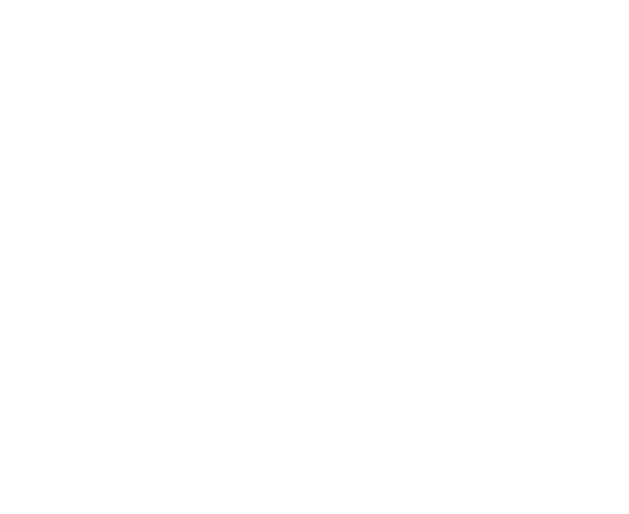

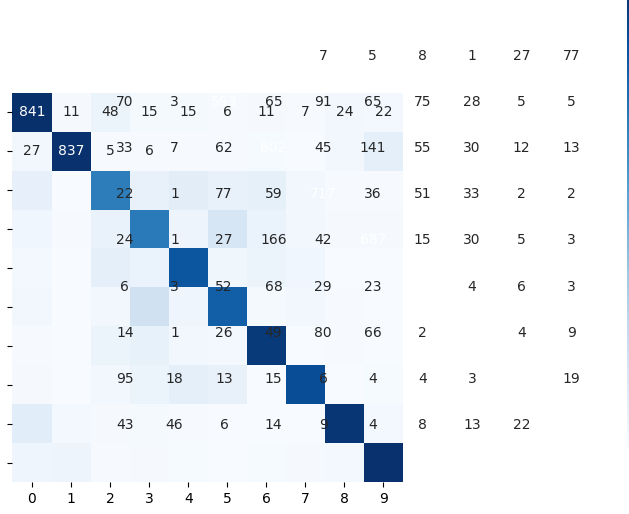

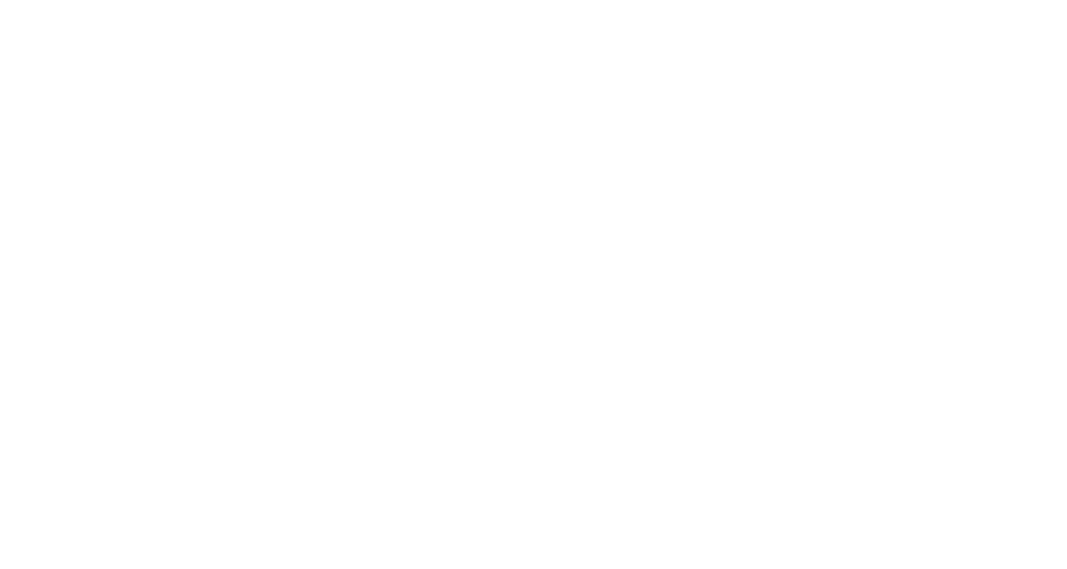

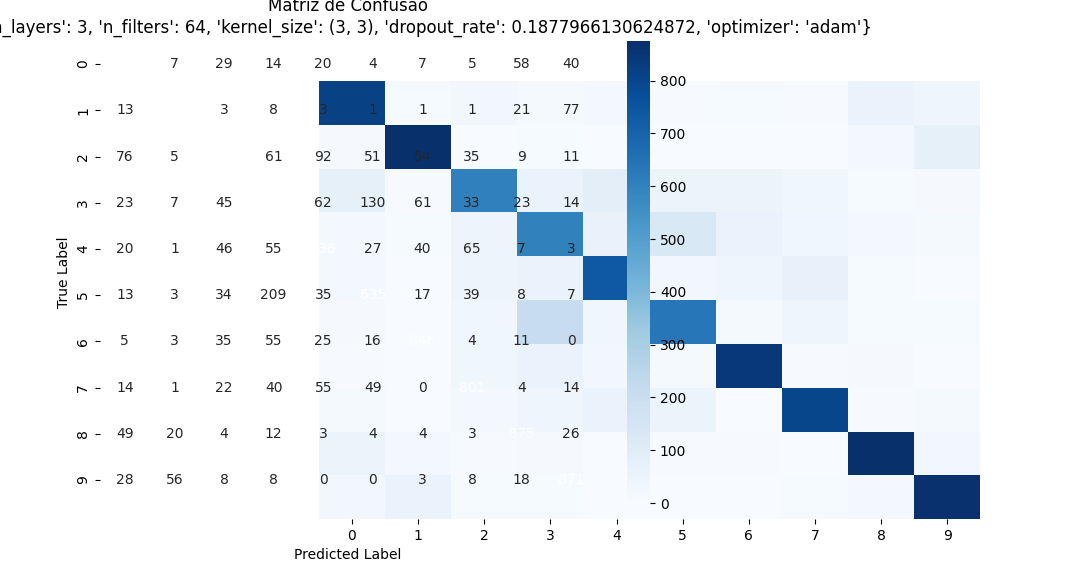

In [7]:
from concurrent.futures import ThreadPoolExecutor, as_completed

def train_model(params):
    model = create_cnn_model(**params)
    model.fit(x_train, y_train, epochs=30, verbose=1)
    return model

def train_and_plot_confusion_matrix(best_trial_params):
    print("Treinando modelo com hiperparâmetros:", best_trial_params)
    model = train_model(best_trial_params)
    title = 'Matriz de Confusão\nHiperparâmetros: ' + str(best_trial_params)
    plot_confusion_matrix(model, x_test, y_test, title)

best_trials = sorted(study.trials, key=lambda t: t.value, reverse=True)
best_trial_params_1 = best_trials[0].params
best_trial_params_2 = best_trials[1].params

with ThreadPoolExecutor(max_workers=2) as executor:
    futures = [executor.submit(train_and_plot_confusion_matrix, best_trial_params_1),
               executor.submit(train_and_plot_confusion_matrix, best_trial_params_2)]

    for future in as_completed(futures):
        future.result()  # Aguardar cada treinamento ser concluído


In [16]:
### Comparar CNN com MLP


import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Função para criar o modelo CNN
def create_cnn_model(n_layers, n_filters, kernel_size, dropout_rate, optimizer):
    model = Sequential()
    model.add(Conv2D(n_filters, kernel_size, activation='relu', input_shape=(32, 32, 3)))
    for _ in range(n_layers - 1):
        model.add(Conv2D(n_filters, kernel_size, activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalização dos dados de imagem
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Codificação one-hot para as etiquetas de classe
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Criação do modelo CNN com hiperparâmetros específicos
model = create_cnn_model(n_layers=3, n_filters=128, kernel_size=(3, 3), dropout_rate=0.2, optimizer='adam')

# Treinamento do modelo CNN
model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

# Avaliação da acurácia da CNN
cnn_loss, cnn_accuracy = model.evaluate(x_test, y_test)


# Calcular o número de parâmetros do modelo CNN
cnn_params = model.count_params()



# Definir a arquitetura da MLP
mlp_model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),  # x_train.shape[1:] será algo como (32, 32, 3)
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 para o número de classes no CIFAR-10
])

# Compilar o modelo MLP
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo MLP
mlp_model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

# Avaliar a acurácia da MLP
mlp_loss, mlp_accuracy = mlp_model.evaluate(x_test, y_test)

# Calcular o número de parâmetros
mlp_params = mlp_model.count_params()


# Imprimir os resultados
print(f"MLP Accuracy: {mlp_accuracy}")
print(f"CNN Accuracy: {cnn_accuracy}")
print(f"MLP Parameters: {mlp_params}")
print(f"CNN Parameters: {cnn_params}")


Epoch 1/100
1407/1407 [==============================] - 11s 6ms/step - loss: 1.6520 - accuracy: 0.3937 - val_loss: 1.2578 - val_accuracy: 0.5520
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.2534 - accuracy: 0.5558 - val_loss: 1.0383 - val_accuracy: 0.6420
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0965 - accuracy: 0.6089 - val_loss: 0.9054 - val_accuracy: 0.6898
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.0013 - accuracy: 0.6492 - val_loss: 0.8751 - val_accuracy: 0.7008
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9268 - accuracy: 0.6733 - val_loss: 0.8330 - val_accuracy: 0.7154
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8732 - accuracy: 0.6928 - val_loss: 0.8487 - val_accuracy: 0.7082
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8285 - accuracy: 0.7093 - val_loss: 0.7629 - val_a